In [1]:
import sys
import os
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms, datasets
from torch import optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
import os
# import matplotlib.pyplot as plt
import numpy as np

py_file_location = "/home/chizm/PatchART/pgd"
sys.path.append(os.path.abspath(py_file_location))

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.version.cuda)

Using cuda device
True
0
11.7


In [12]:
import torch
x = torch.tensor([1., 2.], requires_grad=True)
a = 2
y = a * x


In [13]:
y

tensor([2., 4.], device='cuda:0')

In [ ]:
z = y.max()
# print the gradient of z w.r.t. the parameters a

z.backward()

In [10]:
y.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [4]:
z

tensor(4., device='cuda:0')

In [9]:
print(y.grad)

None


In [3]:
print(z.grad)

None


In [2]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet,self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.maxpool = nn.MaxPool2d(2)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(1024, 32)
        self.fc2 = nn.Linear(32, 10)

    def forward(self,x):
        x = self.conv1(x)
        x = self.maxpool(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.maxpool(x)
        x = self.relu(x)
        # x = torch.flatten(x, 1)
        x = x.view(-1,1024)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        # x = torch.sigmoid(x)
        return x
    
    # split the model into two parts, first part is the feature extractor until fc1, second part is the classifier
    def split(self):
        return nn.Sequential(
            self.conv1,
            self.maxpool,
            self.relu,
            self.conv2,
            self.maxpool,
            self.relu,
            # torch.flatten(x, 1),
            nn.Flatten(),
            self.fc1,
            self.relu
        ), nn.Sequential(
            
            self.fc2
            # nn.Sigmoid()
        )
    
    # use the self.split() to get the feature extractor until fc1
    def get_the_feature(self,x):
        x = self.split()[0](x)
        return x

In [3]:
model = NeuralNet().to(device)
model.load_state_dict(torch.load("/home/chizm/PatchART/pgd/model/pdg_net.pth"))
model.eval()

NeuralNet(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (fc1): Linear(in_features=1024, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=10, bias=True)
)

In [4]:
dataset = torch.load("/home/chizm/PatchART/data/MNIST/processed/test_attack_data_part.pt")

In [5]:
atk_images, labels = dataset

In [6]:
adv_op = model(atk_images)


In [7]:
_,p_adv = torch.max(adv_op, dim = 1)

In [8]:
p_adv

tensor([8, 4, 5, 9, 9, 9, 2, 2, 5, 9, 5, 7, 7, 5, 2, 9, 0, 8, 3, 0, 4, 9, 9, 5,
        4, 9, 8, 9, 5, 5, 8, 8, 2, 9, 4, 9, 9, 4, 4, 3, 8, 9, 9, 3, 8, 2, 9, 8,
        3, 8, 9, 3, 4, 4, 8, 4, 8, 8, 3, 4, 3, 5, 9, 2, 2, 3, 9, 5, 3, 2, 5, 2,
        2, 2, 9, 2, 0, 4, 0, 5, 3, 3, 2, 5, 5, 3, 2, 2, 8, 3, 5, 5, 3, 8, 7, 9,
        1, 3, 4, 9, 2, 5, 3, 5, 5, 9, 4, 4, 9, 4, 0, 5, 3, 9, 2, 5, 4, 2, 7, 3,
        5, 7, 9, 8, 8, 3, 9, 9, 4, 9, 9, 4, 2, 5, 9, 9, 5, 5, 8, 0, 5, 9, 8, 5,
        5, 1, 5, 9, 5, 9, 3, 3, 3, 7, 9, 5, 7, 4, 9, 8, 0, 8, 8, 5, 5, 3, 8, 3,
        4, 2, 2, 4, 9, 3, 3, 8, 9, 8, 5, 5, 2, 3, 4, 8, 9, 3, 8, 2, 7, 2, 8, 5,
        5, 9, 6, 8, 9, 8, 8, 4, 4, 9, 4, 3, 3, 4, 9, 5, 4, 7, 9, 2, 3, 2, 2, 3,
        5, 4, 4, 9, 2, 3, 9, 9, 9, 7, 9, 8, 4, 9, 3, 5, 9, 9, 3, 9, 5, 9, 9, 8,
        3, 9, 2, 9, 2, 5, 9, 9, 3, 5, 3, 9, 3, 3, 2, 8, 5, 9, 8, 3, 8, 3, 4, 8,
        3, 9, 2, 5, 9, 9, 3, 8, 5, 4, 3, 6, 3, 2, 9, 7, 5, 5, 5, 2, 3, 3, 9, 5,
        9, 3, 7, 8, 8, 9, 5, 5, 0, 5, 5,

In [9]:
num_equal = (p_adv == labels).sum().item()

In [10]:
num_equal

0

In [11]:
feature_atk_labels = model.get_the_feature(atk_images)

In [12]:
_,fp_adv = torch.max(feature_atk_labels, dim = 1)

In [13]:
feature_num_equal = (fp_adv == labels).sum().item()
feature_num_equal

4

In [1]:
import torch

a = torch.tensor([1,2,3])
b = torch.tensor([1,2,3])
a*b

tensor([1, 4, 9])

In [3]:
import torch

a = torch.tensor([[1,2,3],[1,4,5]])
b = torch.tensor([[1,2,3],[1,4,5]])
a*b

tensor([[ 1,  4,  9],
        [ 1, 16, 25]])

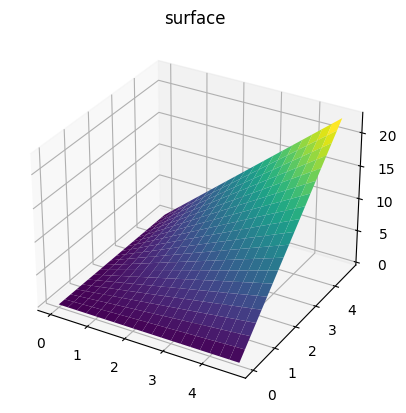

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# draw z = xy 3D graph from x = -5 to 5, y = -5 to 5
x = np.arange(0, 5, 0.25)
y = np.arange(0, 5, 0.25)
X, Y = np.meshgrid(x, y)
Z = X*Y

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface')
plt.show()

In [12]:
import torch

A = torch.tensor([[[1,2,3],[1,4,5]],[[1,2,3],[1,4,5]]])
A.shape

torch.Size([2, 2, 3])

In [14]:
C = torch.sum(A, dim = 2)
C

tensor([[ 6, 10],
        [ 6, 10]])

In [16]:
D = C.unsqueeze(-1)
D

tensor([[[ 6],
         [10]],

        [[ 6],
         [10]]])

In [11]:

C.unsqueeze(2).expand_as(A)

tensor([[[ 6,  6,  6],
         [10, 10, 10]],

        [[ 6,  6,  6],
         [10, 10, 10]]])

In [2]:
import torch
trainset = torch.load('/home/chizm/PatchART/data/MNIST/processed/test.pt')
inputs,labels = trainset

In [4]:
inputs.shape

torch.Size([60000, 28, 28])

In [8]:
inputs[1]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [5]:
labels.shape

torch.Size([60000])

In [39]:
trainattackset = torch.load('/home/chizm/PatchART/data/MNIST/processed/train_attack_data_part.pt')
atk_inputs,atk_labels = trainattackset

In [41]:
atk_inputs.shape


torch.Size([1000, 1, 28, 28])

In [42]:
atk_labels.shape

torch.Size([1000])

In [43]:
testattackset = torch.load('/home/chizm/PatchART/data/MNIST/processed/test_attack_data_part.pt')
tatk_inputs,tatk_labels = testattackset

In [44]:
tatk_inputs.shape

torch.Size([500, 1, 28, 28])

In [1]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
train = datasets.MNIST('./data/', train=True,
                       transform=transforms.Compose([transforms.ToTensor()]),
                       download=True)
train_loader = DataLoader(train, batch_size=128)

In [2]:
train.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [3]:
train[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [5]:
import torch
traindata_list = []
trainlabel_list = []
for x,y in train_loader:
    traindata_list.append(x)
    trainlabel_list.append(y)

train_data = torch.cat(traindata_list)
train_label = torch.cat(trainlabel_list)


In [6]:
train_data.shape

torch.Size([60000, 1, 28, 28])

In [7]:
train_label.shape

torch.Size([60000])

In [8]:
train_data = train_data
torch.save((train_data,train_label),"/home/chizm/PatchART/data/MNIST/processed/train_norm00.pt")

In [53]:

test = datasets.MNIST('./data/', train=False,
                       transform=transforms.Compose([transforms.ToTensor()]),
                       download=True)
test_loader = DataLoader(test, batch_size=128)
testdata_list = []
testlabel_list = []
for x,y in test_loader:
    testdata_list.append(x)
    testlabel_list.append(y)

test_data = torch.cat(testdata_list)
test_label = torch.cat(testlabel_list)
test_data = test_data
test_data.shape


torch.Size([10000, 1, 28, 28])

In [54]:
test_label.shape

torch.Size([10000])

In [55]:
torch.save((test_data,test_label),"/home/chizm/PatchART/data/MNIST/processed/test_norm00.pt")

In [53]:
import cv2
import torch
net = 'CNN_small'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
radius = 0.1
data_number = 200
datas,labels = torch.load(f'/home/chizm/PatchART/data/MNIST/processed/origin_data_{net}_{radius}.pt',map_location=device)
ori_test,ori_test_labels = torch.load(f'/home/chizm/PatchART/data/MNIST/processed/origin_data_{net}_{radius}_{data_number}_others.pt',map_location=device)


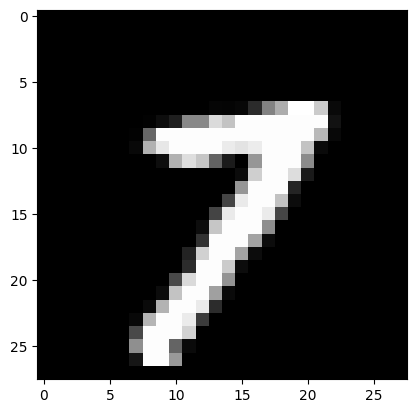

In [54]:
import numpy as np
import matplotlib.pyplot as plt
ori_test_show = ori_test[0]
# convert the tensor to image and show
ori_test_show = ori_test_show.cpu().numpy()
ori_test_show = ori_test_show.squeeze()
ori_test_show = ori_test_show*255
ori_test_show = ori_test_show.astype(np.uint8)
plt.imshow(ori_test_show,cmap='gray')
plt.show()

In [55]:
# the datas is a dataset, and we want to match the test_image with the datas to choose a best match
# test_image is a tensor, and datas is a dataset
test_image = ori_test.cpu().numpy()
test_image = test_image.squeeze()
test_image = test_image*255
test_image = test_image.astype(np.uint8)

datas = datas.cpu().numpy()
datas = datas.squeeze()
datas = datas*255
datas = datas.astype(np.uint8)


match success


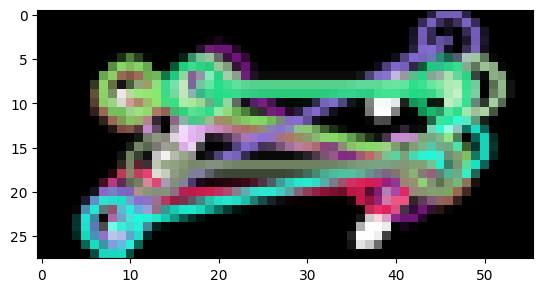

match fail


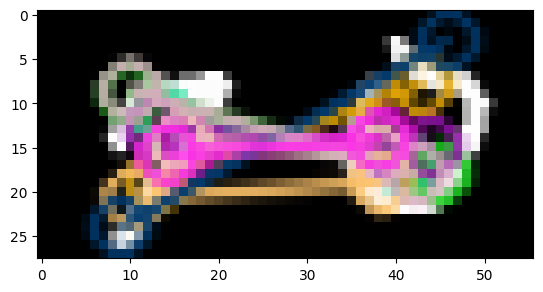

match success


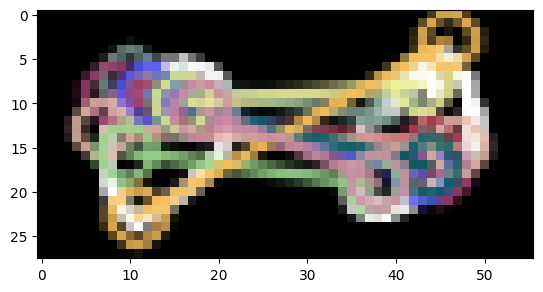

match fail


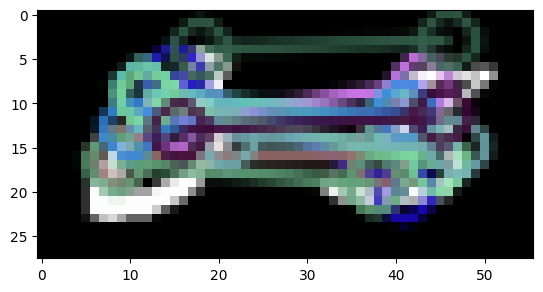

match fail


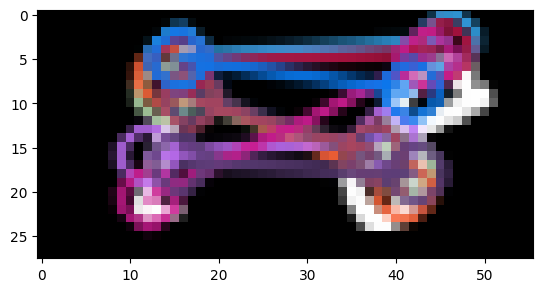

match success


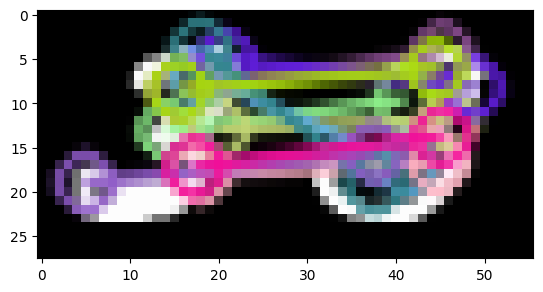

match success


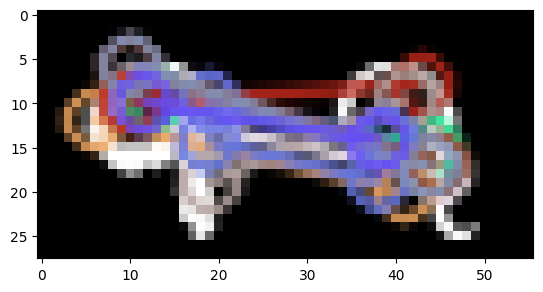

match fail


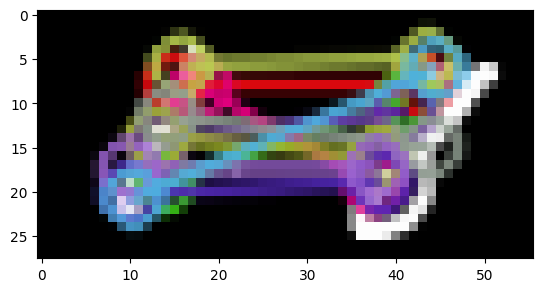

match fail


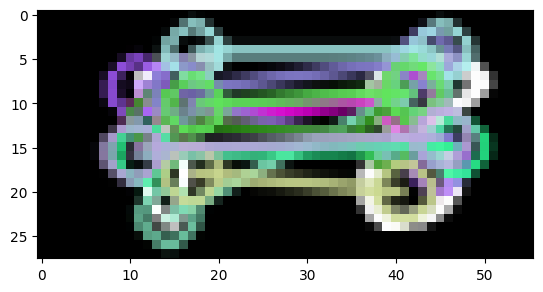

match fail


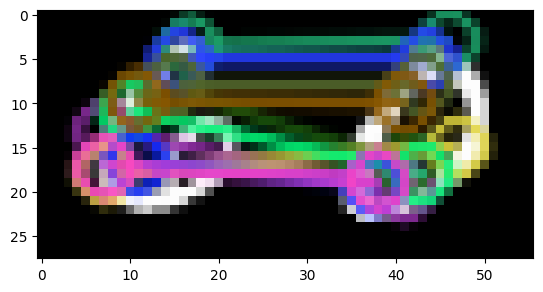

match success


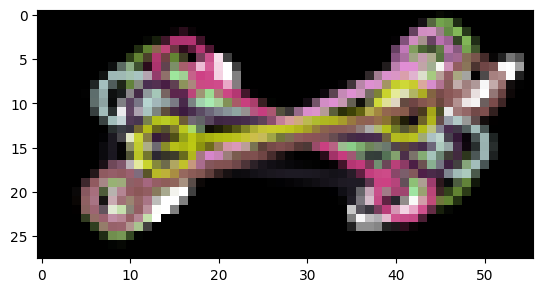

match success


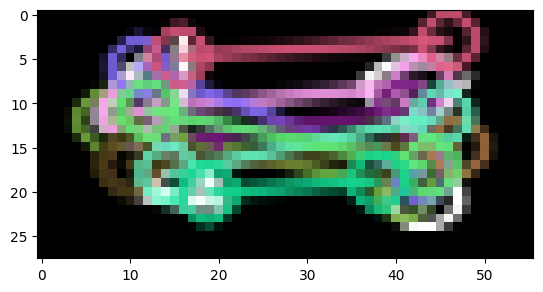

match fail


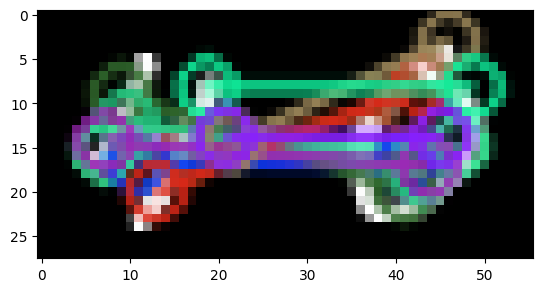

match fail


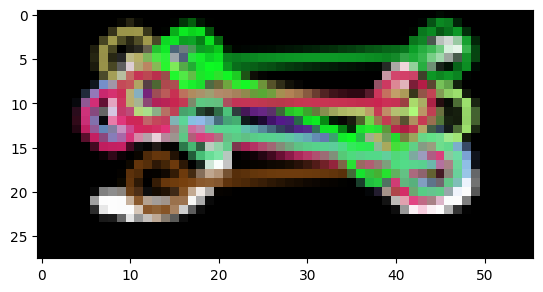

match success


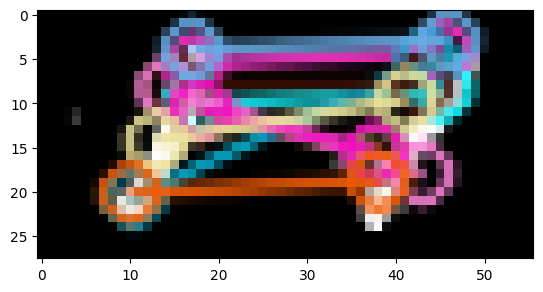

match fail


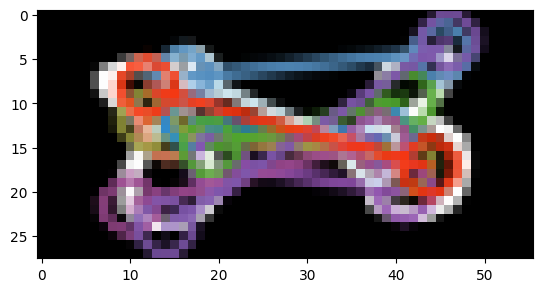

match fail


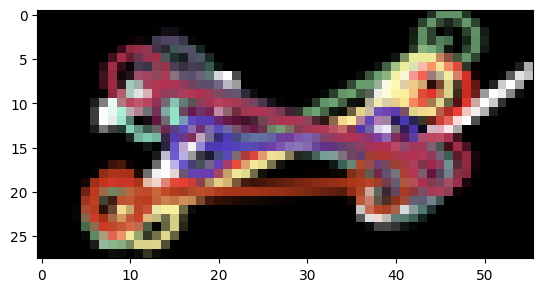

match fail


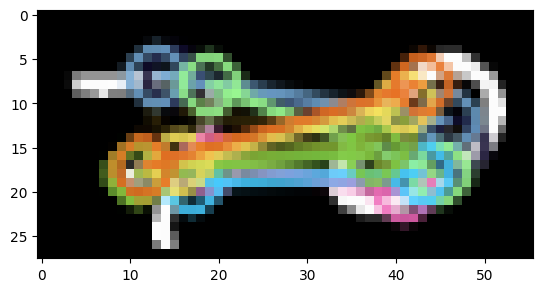

match fail


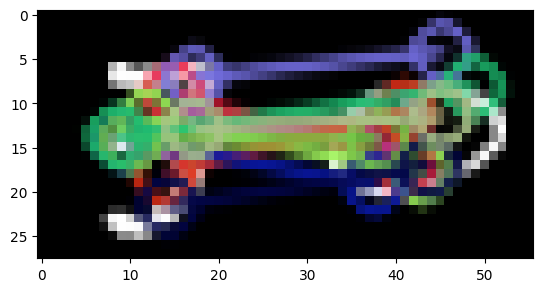

match fail


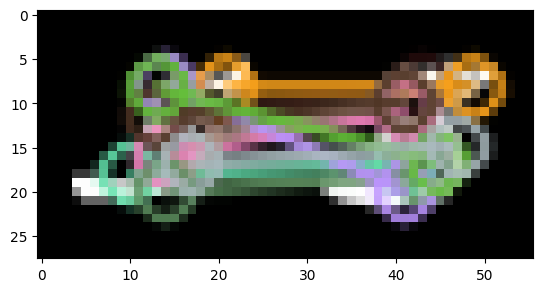

match fail


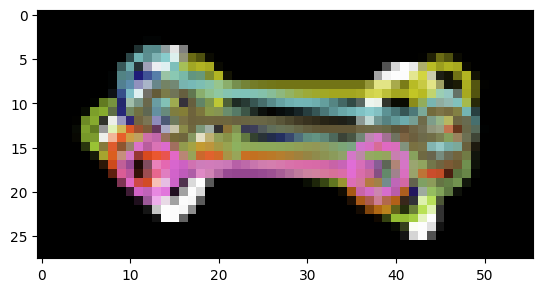

match fail


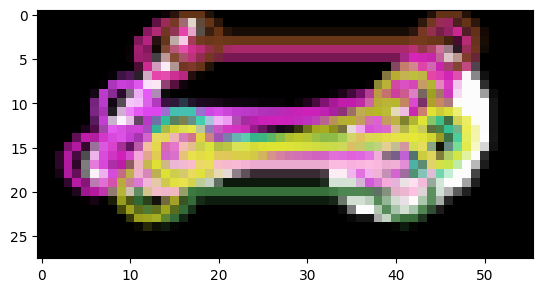

match success


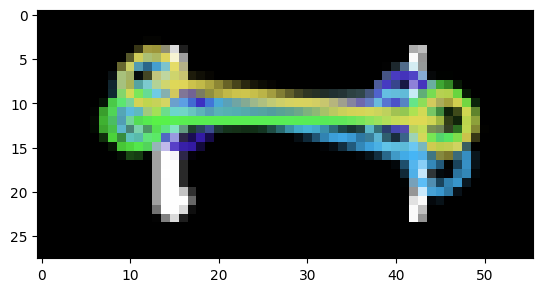

match fail


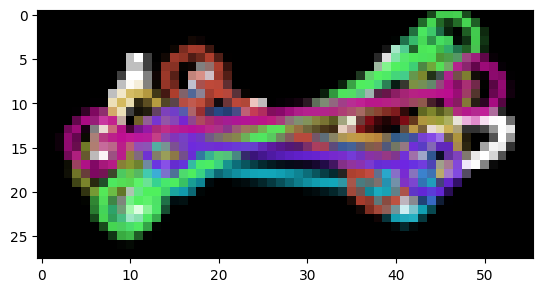

match success


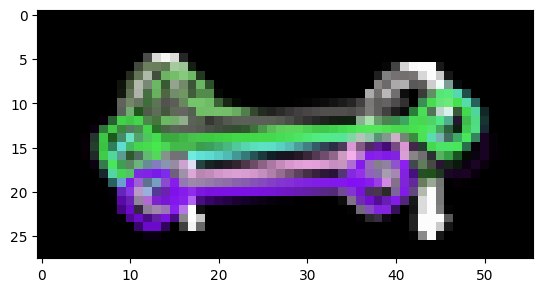

match success


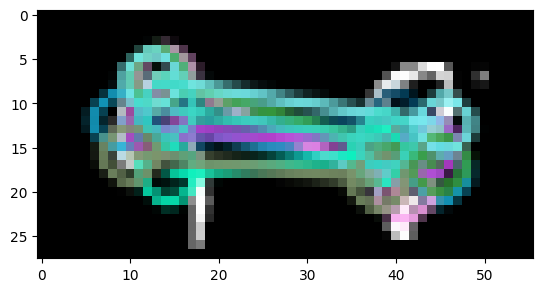

match success


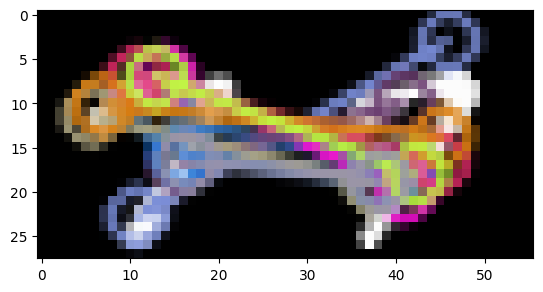

match fail


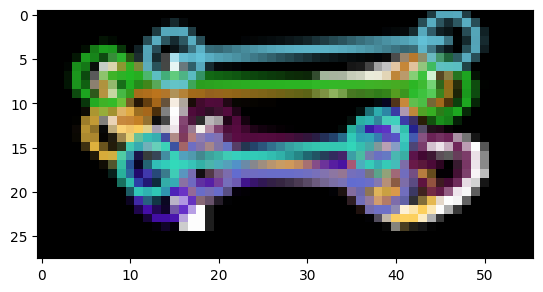

match success


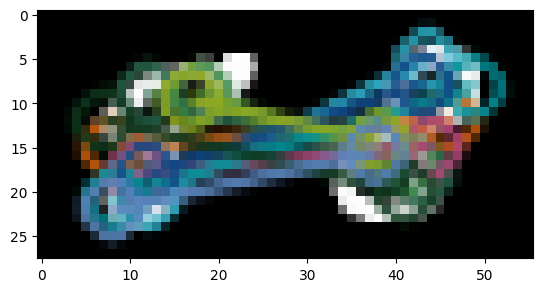

match fail


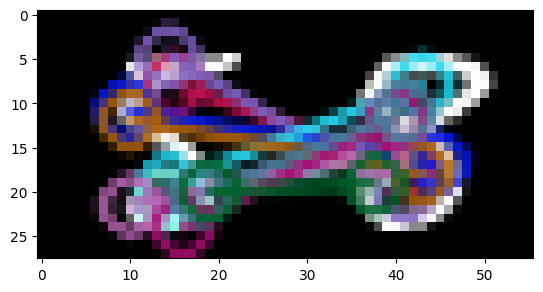

match fail


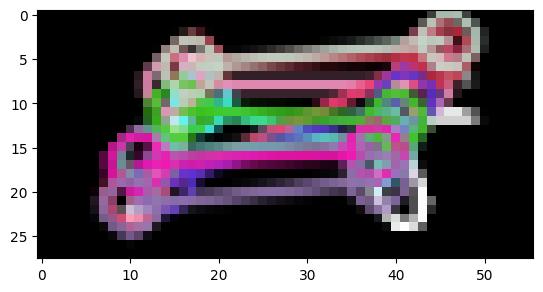

match fail


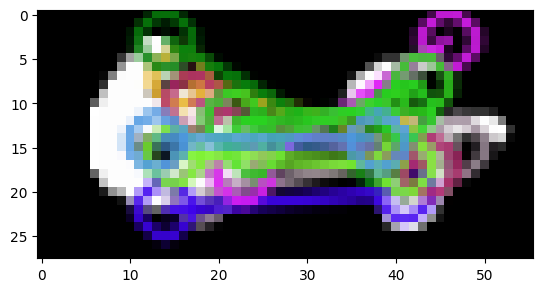

match fail


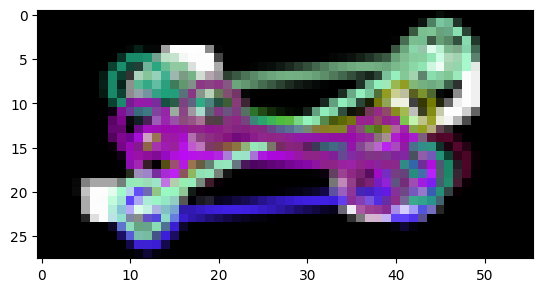

match success


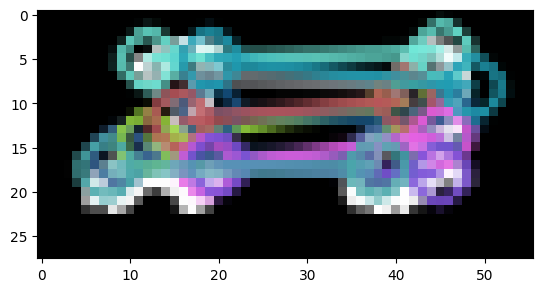

match success


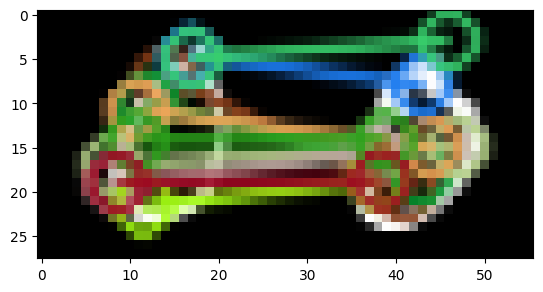

match success


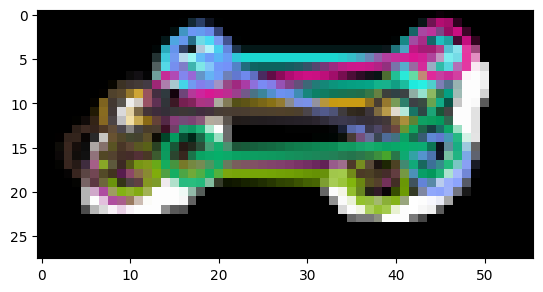

match success


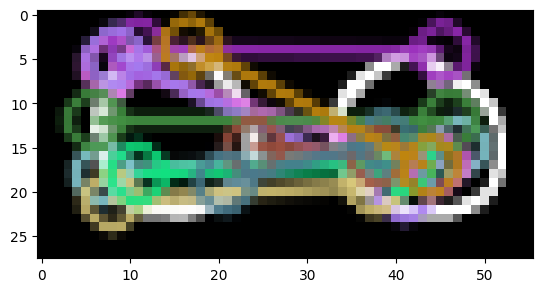

match fail


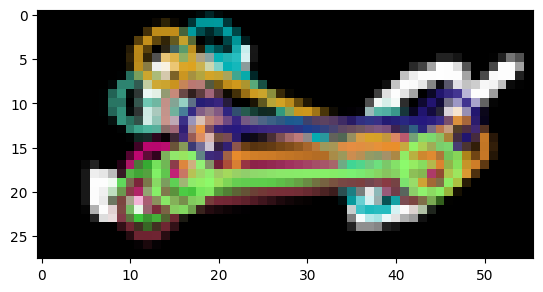

match success


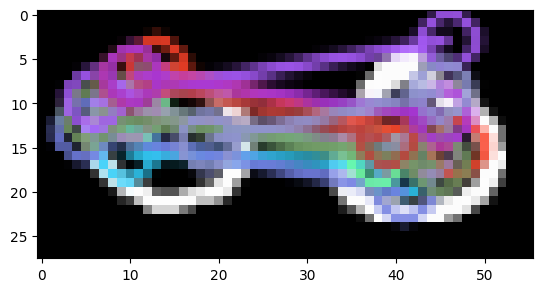

match fail


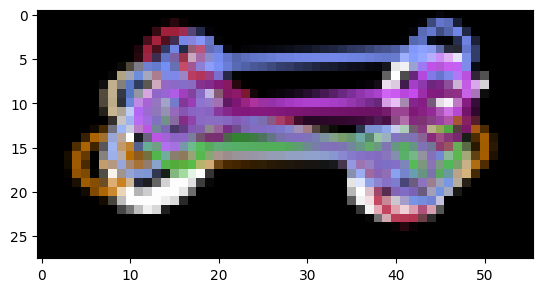

match success


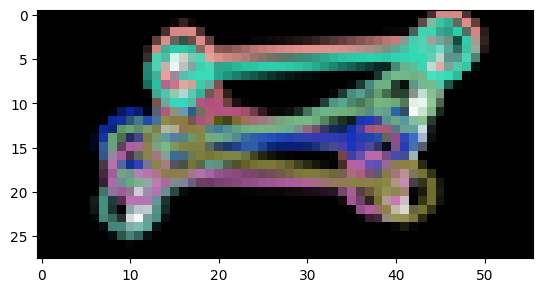

match success


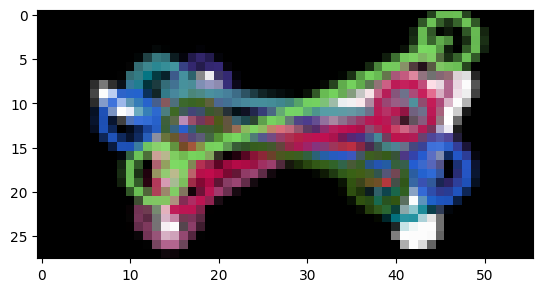

match success


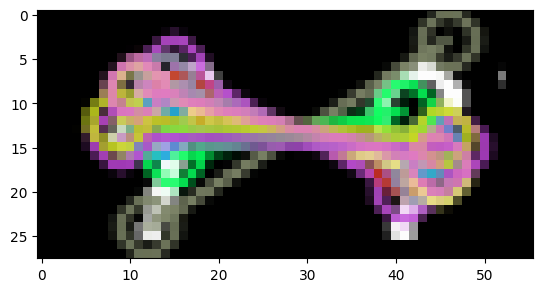

match success


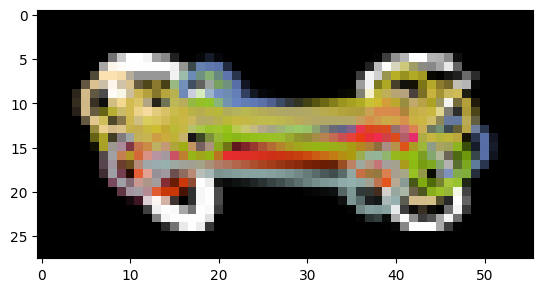

match success


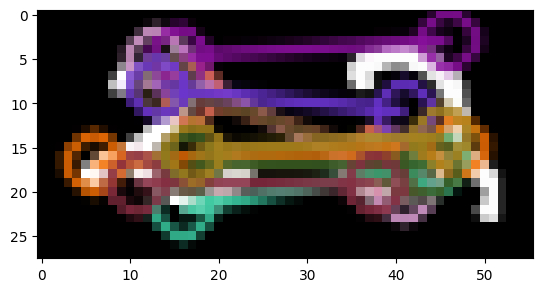

match fail


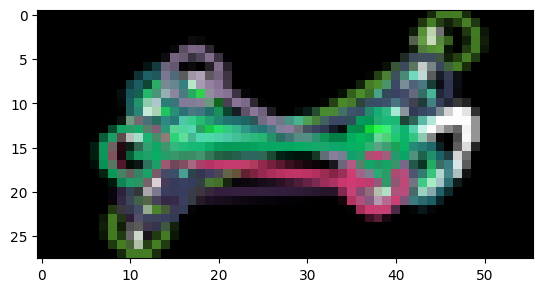

match fail


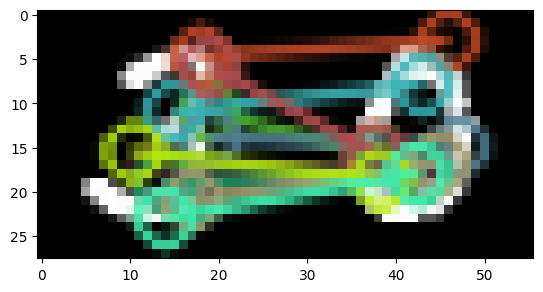

match fail


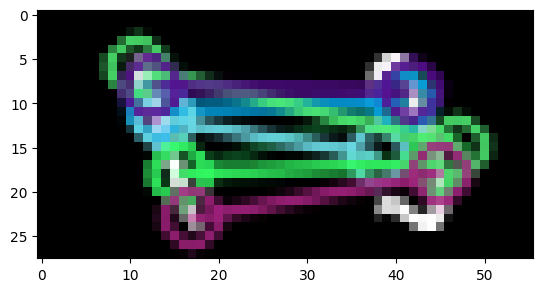

match fail


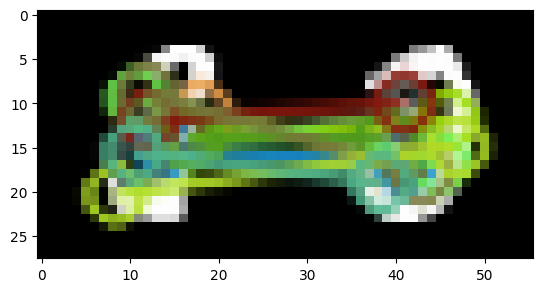

match fail


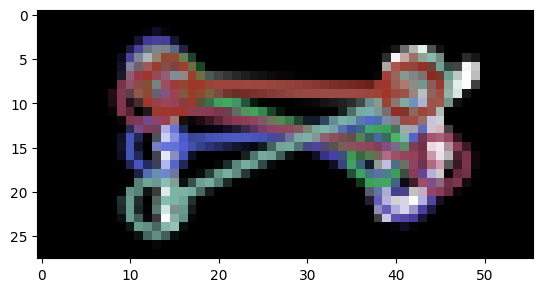

match success


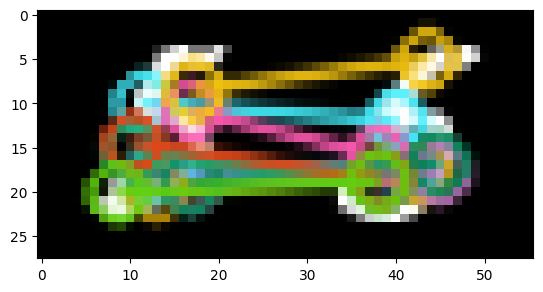

match success


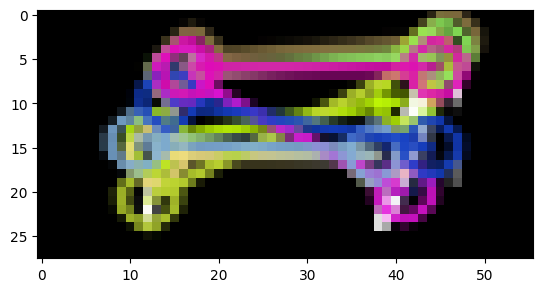

match fail


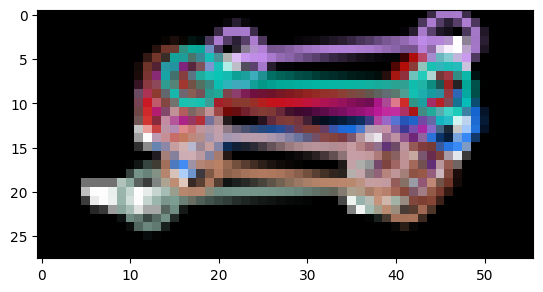

match fail


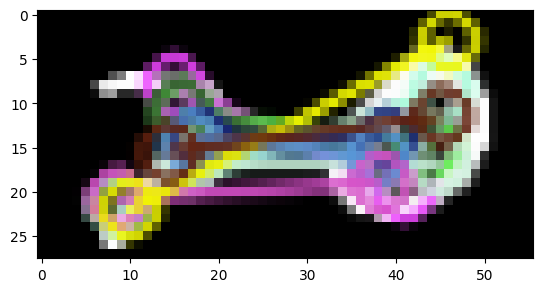

match fail


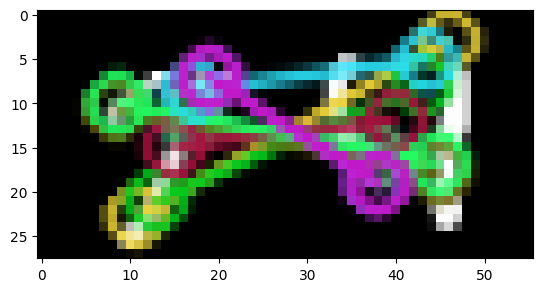

match fail


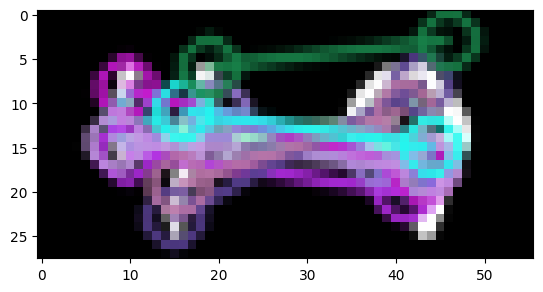

match fail


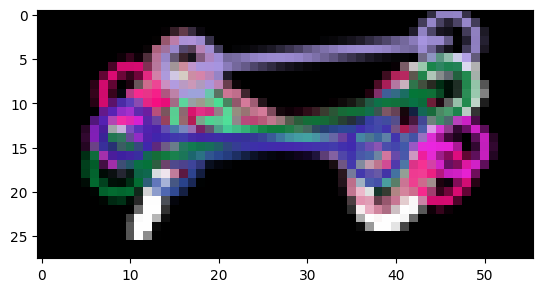

match success


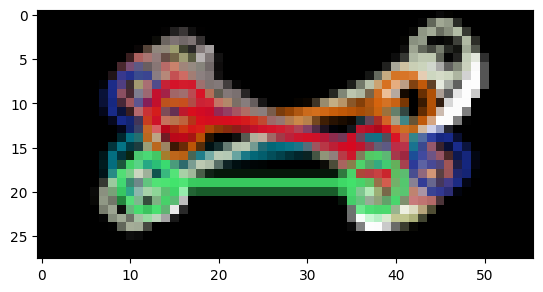

match fail


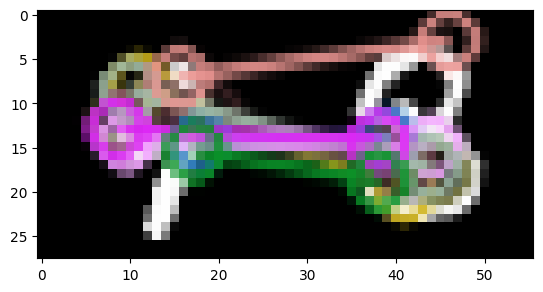

match success


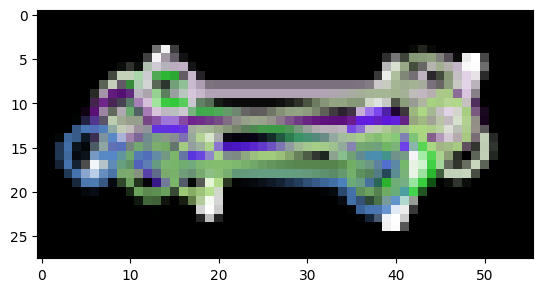

match fail


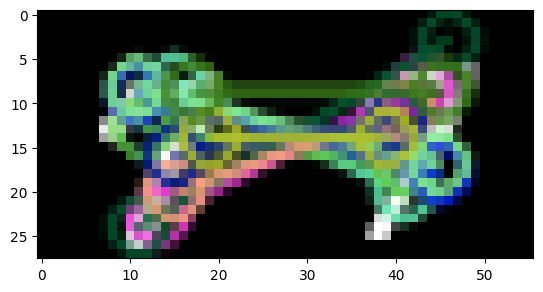

match fail


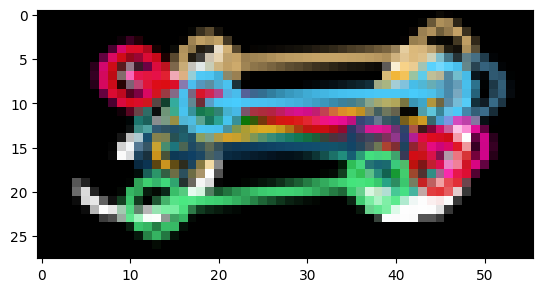

KeyboardInterrupt: 

In [64]:
scc = 0
for j, test_data in enumerate(test_image):
    bf1 = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    # Initiate ORB detector
    orb = cv2.ORB_create(fastThreshold=1, edgeThreshold=1)
    # find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(test_data,None)
    # create BFMatcher object
    bf2 = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    max_match = 0
    max_index = 0
    for i,data in enumerate(datas):
        kp2, des2 = orb.detectAndCompute(data,None)
        # Match descriptors.
        matches = bf2.match(des1,des2)
        # Sort them in the order of their distance.
        matches = sorted(matches, key = lambda x:x.distance)
        if len(matches) > max_match:
            max_match = len(matches)
            max_index = i
    if labels[max_index] == ori_test_labels[j]:
        print("match success")
        scc+=1
    else:
        print("match fail")
    # draw first 10 matches.
    img3 = cv2.drawMatches(test_data,kp1,datas[max_index],kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img3),plt.show()
        

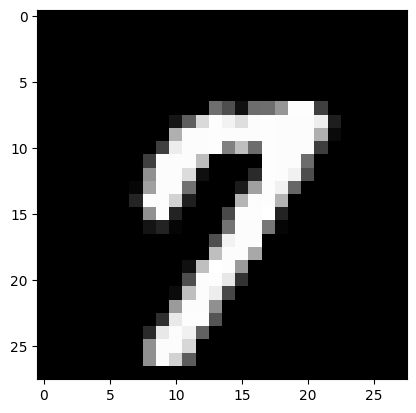

In [49]:
plt.imshow(test_image[1],cmap='gray')

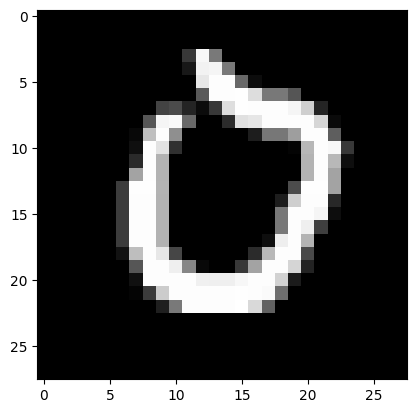

In [48]:
plt.imshow(datas[261],cmap='gray')

In [80]:
# use ssim to compare the similarity of two images
# we store the ssim value of the all matches, and choose the max 10, then we choose the most frequent label
from skimage.metrics import structural_similarity as ssim
scc = 0
fail_example = []
for j, test_data in enumerate(test_image):
    ssim_list = []
    for i,data in enumerate(datas):
        ssim_list.append(ssim(test_data,data))
    ssim_list = np.array(ssim_list)
    max_index = ssim_list.argsort()[-30:][::-1]
    max_index = max_index.tolist()
    max_label = labels[max_index]
    max_label = max_label.cpu().numpy()
    max_label = max_label.squeeze()
    max_label = max_label.astype(np.uint8)
    max_label = max_label.tolist()
    max_label = max(max_label,key=max_label.count)
    if max_label == ori_test_labels[j]:
        print("match success")
        scc+=1
    else:
        print("match fail")
        fail_example.append(j)


match success
match success
match success
match success
match success
match success
match success
match success
match fail
match fail
match success
match fail
match fail
match fail
match success
match fail
match success
match success
match success
match success
match fail
match success
match success
match success
match success
match success
match success
match fail
match success
match fail
match success
match fail
match success
match success
match success
match success
match success
match success
match success
match success
match success
match success
match success
match success
match success
match fail
match success
match success
match success
match success
match success
match success
match success
match success
match success
match fail
match success
match fail
match success
match success
match success
match success
match success
match success
match success
match fail
match success
match success
match success
match fail
match success
match fail
match success
match success
match fail
m

In [81]:
scc

158

IndexError: list index out of range

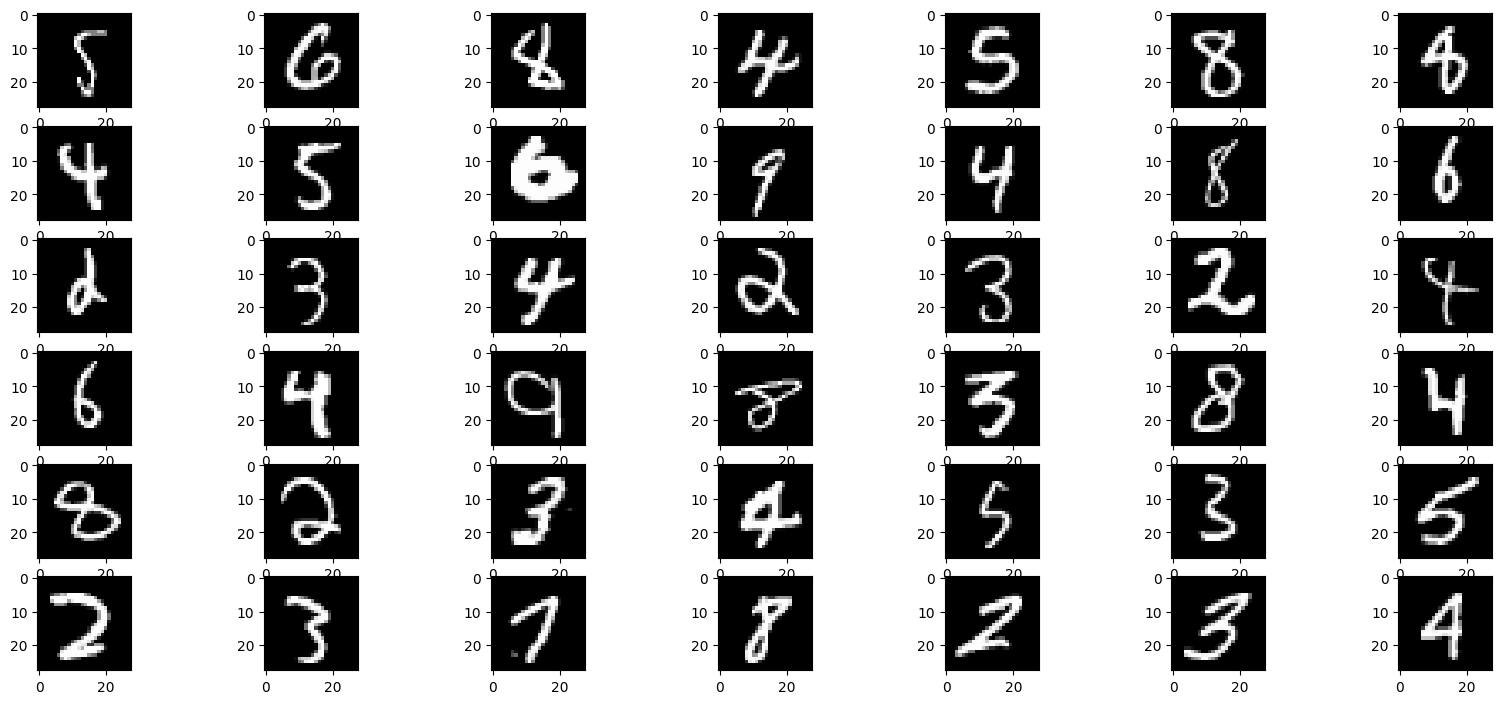

In [85]:
# plot the all fail example(42) in one figure
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(20,10))
columns = 7
rows = 7
for i in range(1, columns*rows +1):
    img = test_image[fail_example[i-1]]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img,cmap='gray')


In [86]:
# compute the ssim for all fail example
from skimage.metrics import structural_similarity as ssim
for i in fail_example:
    ssim_list = []
    for j,data in enumerate(datas):
        ssim_list.append(ssim(test_image[i],data))
    ssim_list = np.array(ssim_list)
    max_index = ssim_list.argsort()[-30:][::-1]
    max_index = max_index.tolist()
    max_label = labels[max_index]
    max_label = max_label.cpu().numpy()
    max_label = max_label.squeeze()
    max_label = max_label.astype(np.uint8)
    max_label = max_label.tolist()
    max_label = max(max_label,key=max_label.count)
    print(max_label,ori_test_labels[i])



1 tensor(5, device='cuda:0')
0 tensor(6, device='cuda:0')
1 tensor(8, device='cuda:0')


Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1078, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/home/chizm/miniconda3/envs/PatchART/lib/python3.8/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/home/chizm/miniconda3/envs/PatchART/lib/python3.8/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2011, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

In [92]:
# use kl divergence to compare the similarity of two images
# we store the kl value of the all matches, and choose the min 10, then we choose the most frequent label
import torch
import torch.nn.functional as F
import numpy as np
import cv2
import torch
net = 'CNN_small'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
radius = 0.1
data_number = 200
datas,labels = torch.load(f'/home/chizm/PatchART/data/MNIST/processed/origin_data_{net}_{radius}.pt',map_location=device)
ori_test,ori_test_labels = torch.load(f'/home/chizm/PatchART/data/MNIST/processed/origin_data_{net}_{radius}_{data_number}_others.pt',map_location=device)
scc = 0

fail_example = []
for j, test_data in enumerate(ori_test):
    kl_list = []
    for i,data in enumerate(datas):
        kl_list.append(F.kl_div(torch.tensor(test_data),torch.tensor(data),reduce='mean').to('cpu'))
    kl_list = np.array(kl_list)
    max_index = kl_list.argsort()[-30:]
    max_index = max_index.tolist()
    max_label = labels[max_index]
    max_label = max_label.cpu().numpy()
    max_label = max_label.squeeze()
    max_label = max_label.astype(np.uint8)
    max_label = max_label.tolist()
    max_label = max(max_label,key=max_label.count)
    if max_label == ori_test_labels[j]:
        print("match success")
        scc+=1
    else:
        print("match fail")
        fail_example.append(j)

/tmp/ipykernel_4140813/3723686869.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  kl_list.append(F.kl_div(torch.tensor(test_data),torch.tensor(data),reduce='mean').to('cpu'))


match fail


/tmp/ipykernel_4140813/3723686869.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  kl_list.append(F.kl_div(torch.tensor(test_data),torch.tensor(data),reduce='mean').to('cpu'))
/home/chizm/miniconda3/envs/PatchART/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


match fail


/tmp/ipykernel_4140813/3723686869.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  kl_list.append(F.kl_div(torch.tensor(test_data),torch.tensor(data),reduce='mean').to('cpu'))
/home/chizm/miniconda3/envs/PatchART/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


match fail


/tmp/ipykernel_4140813/3723686869.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  kl_list.append(F.kl_div(torch.tensor(test_data),torch.tensor(data),reduce='mean').to('cpu'))
/home/chizm/miniconda3/envs/PatchART/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


match fail


/tmp/ipykernel_4140813/3723686869.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  kl_list.append(F.kl_div(torch.tensor(test_data),torch.tensor(data),reduce='mean').to('cpu'))
/home/chizm/miniconda3/envs/PatchART/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1078, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/home/chizm/miniconda3/envs/PatchART/lib/python3.8/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(

KeyboardInterrupt: 